In [1]:
from spatial_info_utils import calculate_cell_stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr #ttest_rel
import matplotlib.patches as mpatches

In [2]:
def combine_halves(spatial_info_box, session):
    spatial_info = []
    if session == 'training1':
        for i in range(len(r_vals)):
            if spatial_info_box[0][i] > 0 and spatial_info_box[1][i] > 0:
                spatial_info.append((spatial_info_box[0][i] + spatial_info_box[1][i])/2)
            elif spatial_info_box[0][i] > 0:
                spatial_info.append(spatial_info_box[0][i])
            elif spatial_info_box[1][i] > 0:
                spatial_info.append(spatial_info_box[0][i])
            else:
                spatial_info.append('nan')
    
    if session == 'training2':
        for i in range(len(r_vals)):
            if spatial_info_box[2][i] > 0 and spatial_info_box[3][i] > 0:
                spatial_info.append((spatial_info_box[2][i] + spatial_info_box[3][i])/2)
            elif spatial_info_box[2][i] > 0:
                spatial_info.append(spatial_info_box[2][i])
            elif spatial_info_box[3][i] > 0:
                spatial_info.append(spatial_info_box[3][i])
            else:
                spatial_info.append('nan')
    return spatial_info

# print(r_vals)
# print(spatial_info)

In [3]:
animal = 'JC274'
session = 'training1'
day_index = 2 #Following below:
days_dict = {'JC315': ['20240406', '20240407'], 
             'JC283': ['20220919', '20220920', '20220921', '20220923'], 
             'JC274': ['20220312', '20220313', '20220314', '20220315']}

rewarded_arms_dict = {'JC315': ['3', '8'], 
                      'JC283': ['7', '2'], 
                      'JC274': ['3', '7']} #, '8' also for JC274, but only for some days
arms = rewarded_arms_dict[animal]

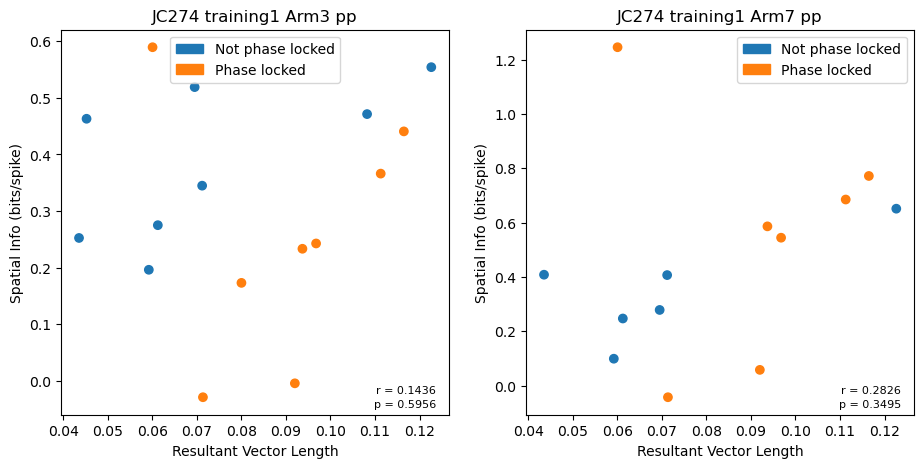

In [4]:
fig, ax = plt.subplots(1, len(arms), figsize = (11, 5))
cell_type = 'pp' #cell_type is 'pp', 'pc', 'p1' or 'bp' and 'b1' in some cases
for k in range(len(arms)):
    a_bars, r_vals, p_vals, spatial_info_box = calculate_cell_stats(animal, session, day_index, arms[k], cell_type)
    # print(r_vals)
    spatial_info = combine_halves(spatial_info_box, session)
    #Color by whether cells are phase locked
    phase_locked_cell = [i < 0.05 for i in p_vals]
    colors = ['tab:blue' for i in p_vals]
    for j in range(len(colors)):
        if phase_locked_cell[j]:
            colors[j] = 'tab:orange'
    color_dict = {'Not phase locked': 'tab:blue', 'Phase locked': 'tab:orange'}
    legend_patches = [mpatches.Patch(color=color, label=locked) for locked, color in color_dict.items()]
    ax[k].legend(handles=legend_patches) #, loc='center left', bbox_to_anchor=(1, 0.5), title = 'Phase Locked?'
    ax[k].set_xlabel('Resultant Vector Length')
    ax[k].set_ylabel('Spatial Info (bits/spike)')
    ax[k].set_title(animal + ' ' + session + ' Arm' + arms[k] + ' ' + cell_type)
    if len(r_vals) != 0 and len(spatial_info) != 0:
        ax[k].scatter(r_vals, spatial_info, c = colors)
        corr_coef, p_val = pearsonr(r_vals, spatial_info)
        ax[k].annotate(f'r = {corr_coef:.4f}', xy=(270, 15), 
                          color = 'black', xycoords = 'axes points', fontsize = 8, ha = 'right')
        ax[k].annotate(f'p = {p_val:.4f}', xy=(270, 5), 
                          color = 'black', xycoords = 'axes points', fontsize = 8, ha = 'right')
        # print(f'Corr coef: {corr_coef:.2f}, p-val: {p_val:.5f}')

plt.savefig('Spatial_info_' + animal + '_' + days_dict[animal][day_index] + '_' + session + '_' + cell_type + '.png', format = 'png')